In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score





In [2]:
# Load your dataset
data = pd.read_csv('Processed Data LCS.csv')

# Data preprocessing
X = data[['PM2.5_LCS']]
y = data['PM2.5_ref']


In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [4]:
# Predict PM2.5_ref using the trained model
y_pred = rf_regressor.predict(X_test)


In [5]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [6]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')


Mean Squared Error (MSE): 65.04868732605637
R-squared (R2) Score: -0.1073992945059894


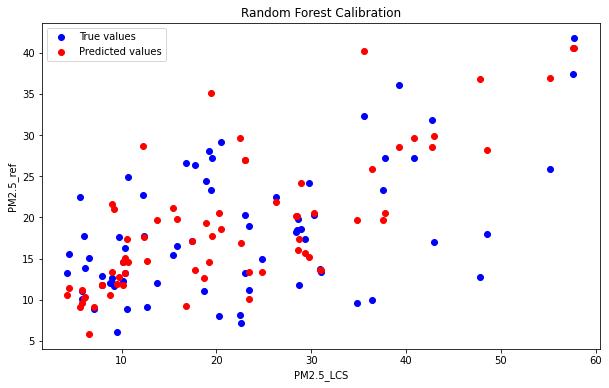

In [7]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.xlabel('PM2.5_LCS')
plt.ylabel('PM2.5_ref')
plt.legend()
plt.title('Random Forest Calibration')
plt.show()


In [18]:
print("Predicted PM2.5_ref values for test dataset:")

print(y_pred)

Predicted PM2.5_ref values for test dataset:
[20.5806 10.305  36.9802 25.8539 11.7619 11.9406 19.7616 12.8252 13.3929
 15.0597 19.2863 21.1897 19.7046 28.1571 35.1336 14.6087 14.6499 17.1705
 17.7751 17.3238 14.5563 13.5747 40.5735 10.6029 11.7458 29.6403 16.9187
 27.0204 21.0092 13.3248 20.1597  9.2717 15.1963 11.2015 18.6432 11.3733
  9.1306 19.7264 10.0943 24.1976 12.5873 13.2442 19.6689 40.5735 40.1737
  9.0937 11.7619 29.8517  5.8359 28.6001 20.5973 29.6054 13.376  17.6324
 13.5636 28.575  20.1597 16.0694 17.3676 13.5662  9.6087 10.2132 36.7882
 14.562  21.6396 28.6568 20.5684 10.5958 15.7114 27.0204 21.9242]


In [26]:
df = pd.DataFrame({'LCS_Actual_PM2.5': X_test['PM2.5_LCS'], 'Calibrated_PM2.5': y_pred})
print(df)


     LCS_Actual_PM2.5  Calibrated_PM2.5
220         37.745667           20.5806
42           6.114516           10.3050
286         55.204000           36.9802
181         36.386000           25.8539
56           7.928387           11.7619
..                ...               ...
342         30.247333           20.5684
195          8.724333           10.5958
242         29.316154           15.7114
93          23.001613           27.0204
185         26.241667           21.9242

[71 rows x 2 columns]


In [19]:
import seaborn as sns

<AxesSubplot:xlabel='PM2.5_LCS'>

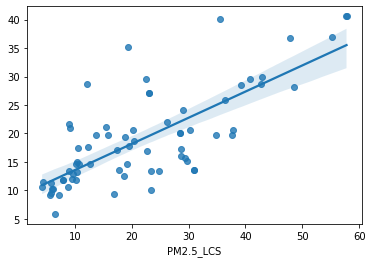

In [23]:
sns.regplot(X_test, y_pred)
